## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

## 1. Exploratory Data Analysis (EDA)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('/content/Dataset/Task (2) Dataset.csv')

### Perform summary statistics on the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


In [5]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


### Identify and analyze patterns in the data.

In [6]:
num_columns = df[['TrafficIndexLive','JamsCount','JamsDelay','JamsLength','TrafficIndexWeekAgo','TravelTimeHistoric','TravelTimeLive']]
correlation_matrix = num_columns.corr()
print(correlation_matrix)

                     TrafficIndexLive  JamsCount  JamsDelay  JamsLength  \
TrafficIndexLive             1.000000   0.876216   0.861349    0.866799   
JamsCount                    0.876216   1.000000   0.982459    0.952762   
JamsDelay                    0.861349   0.982459   1.000000    0.962679   
JamsLength                   0.866799   0.952762   0.962679    1.000000   
TrafficIndexWeekAgo          0.903282   0.806545   0.775028    0.787548   
TravelTimeHistoric           0.331072   0.305166   0.303733    0.306312   
TravelTimeLive               0.642326   0.566874   0.571188    0.569065   

                     TrafficIndexWeekAgo  TravelTimeHistoric  TravelTimeLive  
TrafficIndexLive                0.903282            0.331072        0.642326  
JamsCount                       0.806545            0.305166        0.566874  
JamsDelay                       0.775028            0.303733        0.571188  
JamsLength                      0.787548            0.306312        0.569065  
Traf

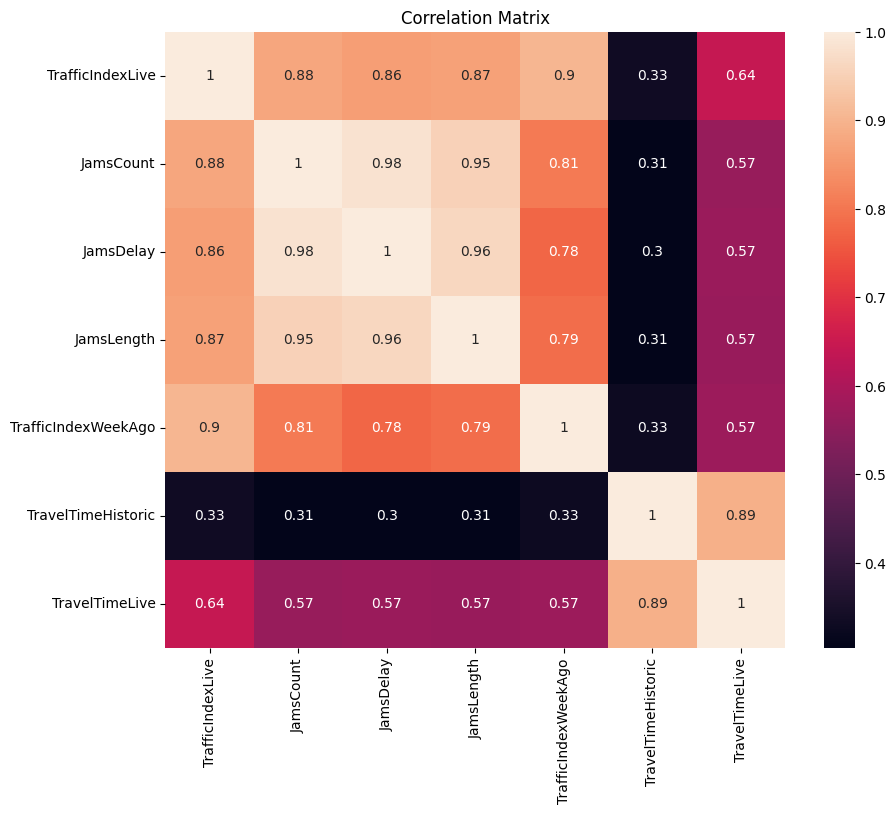

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

<Axes: ylabel='TrafficIndexWeekAgo'>

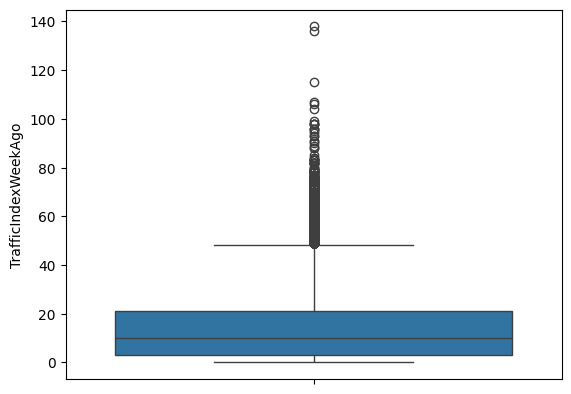

In [9]:
sns.boxplot(df['TrafficIndexWeekAgo'])

In [11]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'TrafficIndexWeekAgo')

<Axes: ylabel='TrafficIndexLive'>

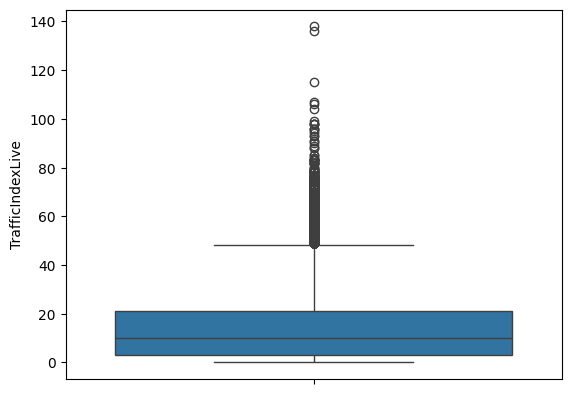

In [10]:
sns.boxplot(df['TrafficIndexLive'])

In [13]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'TrafficIndexLive')

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

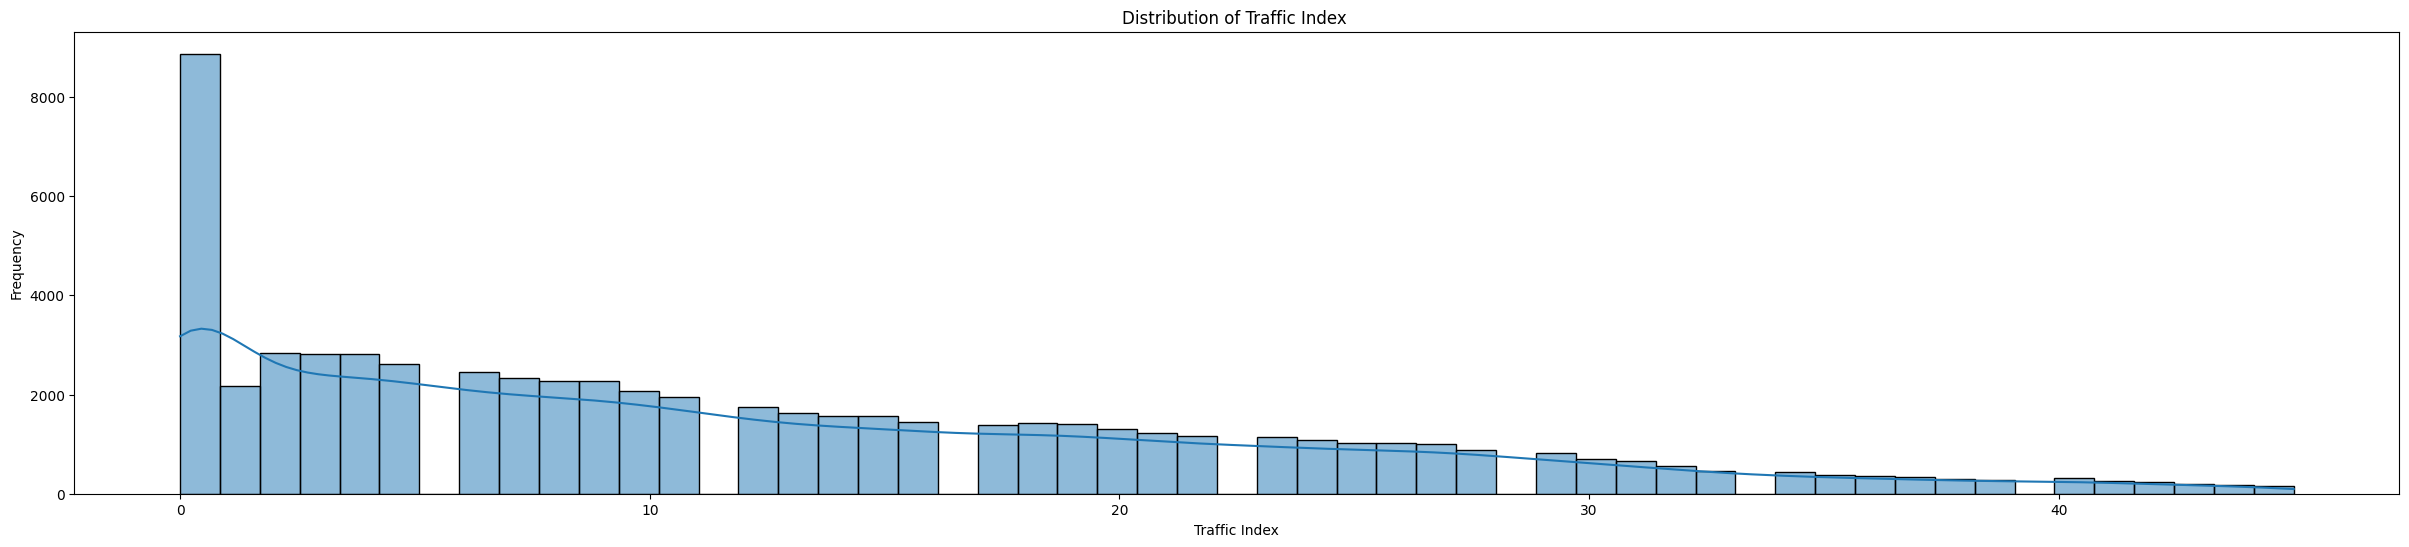

In [16]:
plt.figure(figsize=(30, 6))
sns.histplot(df['TrafficIndexLive'], kde=True)
plt.title('Distribution of Traffic Index ')
plt.xlabel('Traffic Index')
plt.ylabel('Frequency')
plt.show()

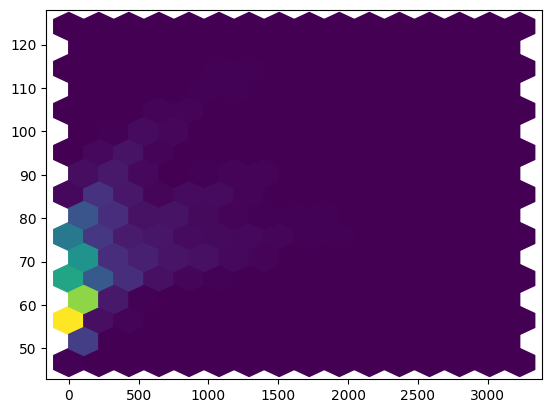

In [19]:
plt.hexbin(x=df['JamsDelay'], y=df['TravelTimeLive'], gridsize=15)

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


<Figure size 700x700 with 0 Axes>

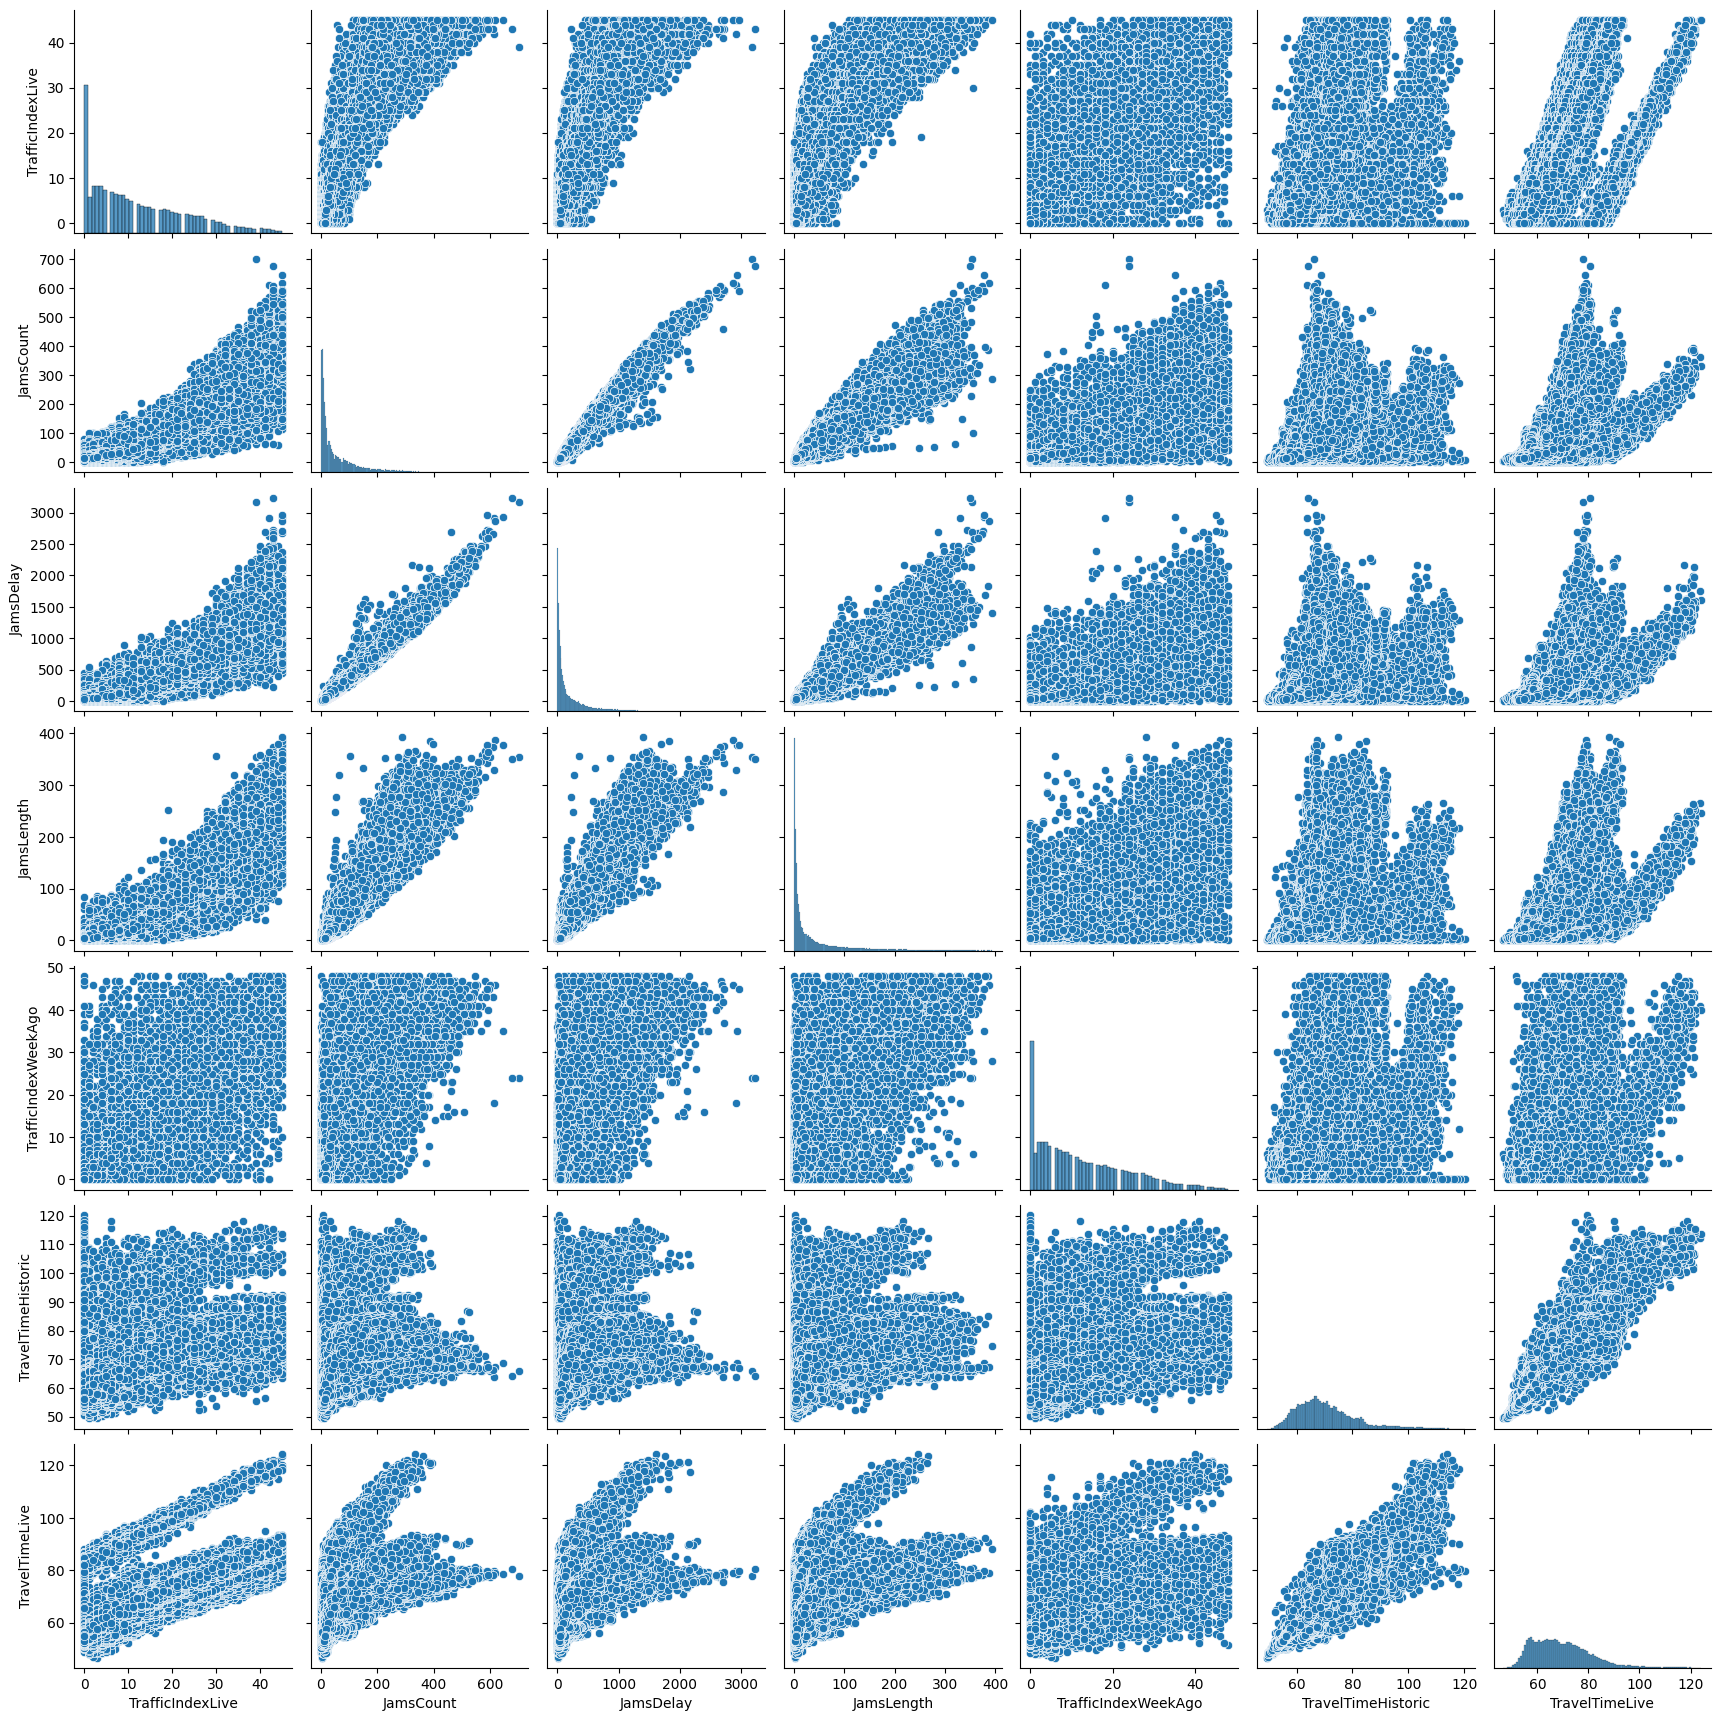

In [20]:
plt.figure(figsize=(7,7))
sns.pairplot(df)
plt.show()

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


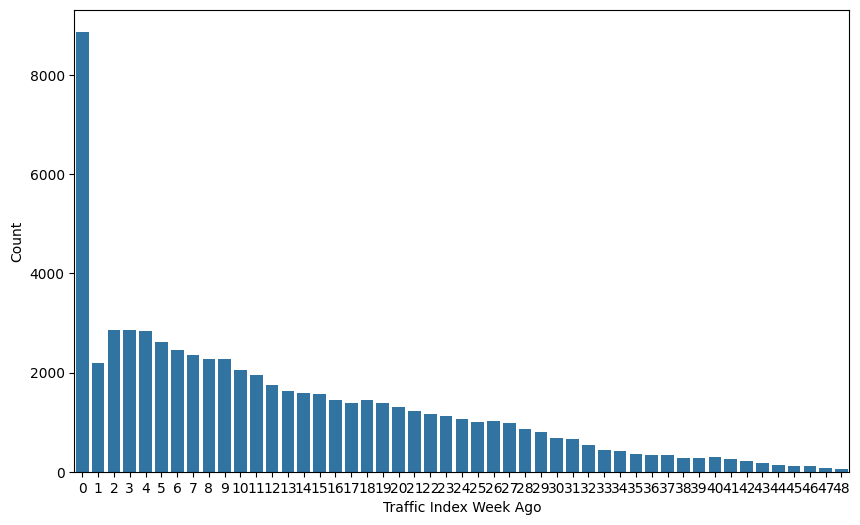

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TrafficIndexWeekAgo', data=df)
plt.xlabel('Traffic Index Week Ago')
plt.ylabel('Count')
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

<ipython-input-21-6bbc8e3421f4>:1: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.05`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=df, orient='v', bw=0.05, cut=0)


<Axes: >

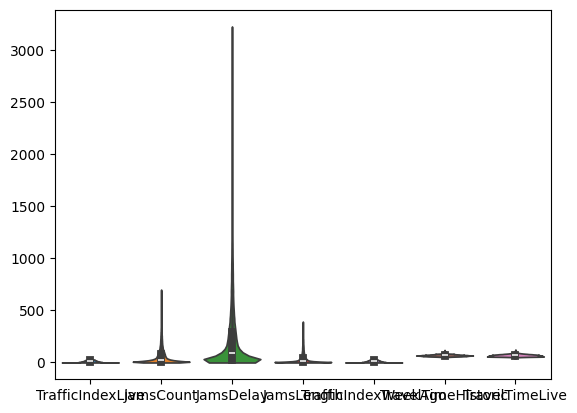

In [21]:
sns.violinplot(data=df, orient='v', bw=0.05, cut=0)

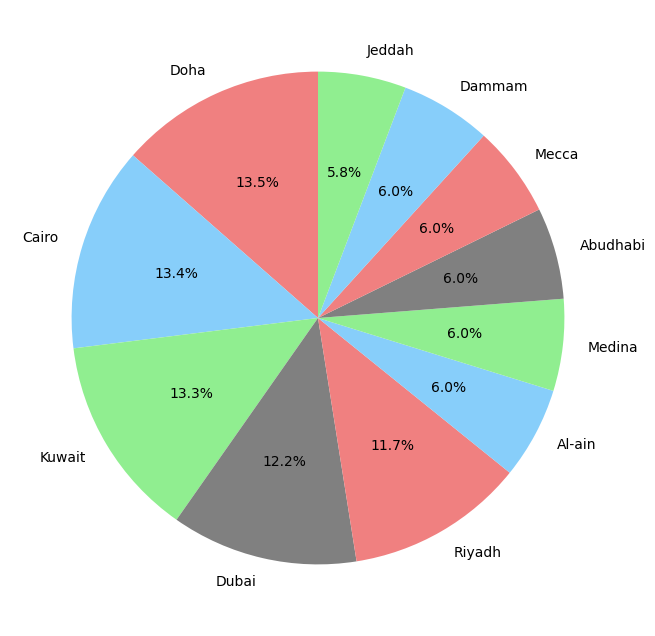

In [26]:
city_counts = df['City'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue','lightgreen','gray'])
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>